In [26]:
import io 
import json
from ast import literal_eval

from glob import glob

from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import timm
from torchvision import transforms
import tarfile 

# from liptrf.models.vit import L2Attention, ViT
# from liptrf.models.layers.linear import trunc, l2_normalize

In [3]:
class Byte2Image(object):
    def __call__(self, sample):
        return Image.open(io.BytesIO(sample))

def identity(x):
    return x

In [70]:
model = timm.create_model('vit_large_patch16_384', pretrained=True)

In [71]:
sum(p.numel() for p in model.parameters())

304715752

In [72]:
model.eval()
print ('')

In [76]:
img = Image.open('../imagenet-sample-images/n01440764_tench.JPEG')
timg = trf(img).unsqueeze(0)
# timg = torch.randn(1, 3, 224, 224)
probas = model(timg)

In [77]:
probas.min(), probas.max()

(tensor(-1.9229, grad_fn=<MinBackward1>),
 tensor(7.1534, grad_fn=<MaxBackward1>))

In [55]:
# ViT-T/16 5717416
# ViT-B/16 86567656
# DeiT-T   5717416
# DeiT-S   22050664
# SWIN-T   28288354
# SWIN-S   49606258

In [38]:
fin = open('../imagenet-sample-images/imagenet1000_clsidx_to_labels.txt', 'r')
class_map = literal_eval(fin.read())
fin.close()

fin = open('../imagenet-sample-images/imagenet_class_index.json', 'r')
class_map2 = json.load(fin)
fin.close()

In [4]:
image_names = glob('../imagenet-sample-images/*JPEG')


In [34]:
idx = 2
print (image_names[idx])
img = Image.open(image_names[idx])
img = trf(img).unsqueeze(0)
probas = model(img)
print (class_map[torch.argmax(probas).item()])

../imagenet-sample-images/n01484850_great_white_shark.JPEG
great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias


In [75]:
# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
trf = transforms.Compose([transforms.Resize(384), transforms.CenterCrop(384), transforms.ToTensor()])

In [12]:
tfile = tarfile.open('../data/val/val-01.tar')

In [50]:
ext = tfile.extractfile('01024.x.ext.txt').read()
img = tfile.extractfile('01024.x.img.pil').read()
cls_txt = tfile.extractfile('01024.y.class.txt').read()
lbl = tfile.extractfile('01024.y.cls').read()

In [51]:
cls_txt

b'n02500267'

In [42]:
bio = Byte2Image()

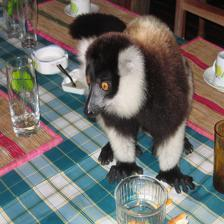

In [43]:
bio(img)

In [44]:
cls_txt

b'n02500267'

In [45]:
lbl

b'75'

In [47]:
imgt = trf(bio(img)).unsqueeze(0)
probas = model(imgt)
print (class_map2[str(torch.argmax(probas).item())])

['n02500267', 'indri']


In [36]:
torch.argmax(probas).item()

384

In [58]:
class_map_rev = {}
for k in class_map2.keys():
    class_map_rev[class_map2[k][0]] = int(k)